In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LeakyReLU
from keras import models, layers
from PIL import Image
import random
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [3]:
labels = os.listdir('C:\\Users\\MBR\\Downloads\\ANN\\data\\natural_images')
print(labels)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


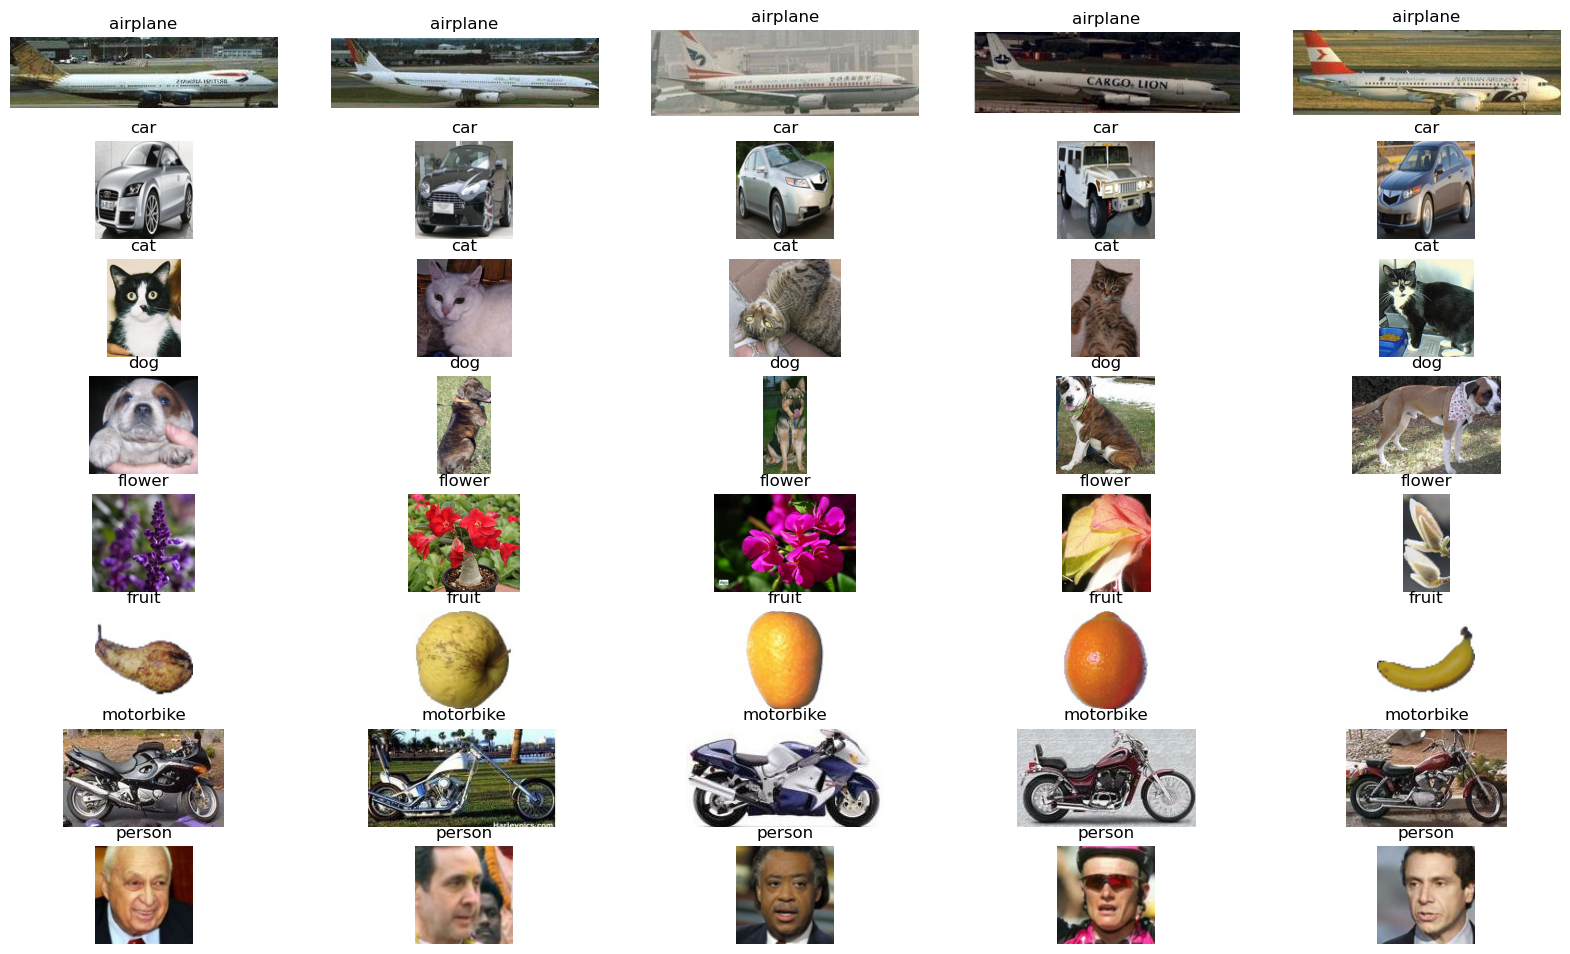

In [4]:
labels = os.listdir('C:\\Users\\MBR\\Downloads\\ANN\\data\\natural_images')
path = Path('C:\\Users\\MBR\\Downloads\\ANN\\data\\natural_images')
def displayRandomImagesFromEveryFolder(directory=path, samplesPerFolder=5):

    fig = plt.figure(figsize=(20,15))

    for rowIndex in range(1, 9):
        subdirectory = str(rowIndex)
        path = directory/labels[rowIndex -1]
        images = os.listdir(path)
        for sampleIndex in range(1,samplesPerFolder+1):
            randomNumber = random.randint(0, len(images)-1)
            image = Image.open(path/images[randomNumber])
            ax = fig.add_subplot(10, 5, samplesPerFolder*rowIndex + sampleIndex)
            ax.axis("off")

            plt.title(str(labels[rowIndex -1]))
            plt.imshow(image, cmap='gray')

    plt.show()

displayRandomImagesFromEveryFolder()

In [5]:
import cv2
import os

x_data = []
y_data = []

for label in labels:
    path = r'C:\\Users\\MBR\\Downloads\\ANN\\data\\natural_images\\' + label
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(os.path.join(path, image_path))
        if image is not None:
            image_resized = cv2.resize(image, (56, 56)).flatten()
            x_data.append(np.array(image_resized))
            y_data.append(label)
        else:
            print(f"Failed to load image: {os.path.join(path, image_path)}")


In [6]:
x_data = np.array(x_data)
y_data = np.array(y_data)
x_data = x_data/255

In [7]:
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(y_data)

In [8]:
r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data[r]
Y = y_encoded[r]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

In [10]:
X_train.shape

(5519, 9408)

In [11]:
print("Number of images in X_train:", X_train.shape[0])

Number of images in X_train: 5519


In [12]:
print("Number of images in X_test:", X_test.shape[0])

Number of images in X_test: 1380


In [13]:
import matplotlib.pyplot as plt
    # create accuracy sublpot
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """
    plt.figure(figsize=(20, 15))
    fig, axs = plt.subplots(2) 
    fig.tight_layout(pad=3.0)
    axs[0].plot(history.history["accuracy"], label="train accuracy",color="green")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy",color='blue')
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train loss",color="red")
    axs[1].plot(history.history["val_loss"], label="test loss",color='orange')
    axs[1].set_ylabel("loss")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("loss eval")
    plt.show()

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [15]:
model = models.Sequential()
model.add(layers.Dense(2048,activation='relu', input_shape= (9408,)))
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(128,activation = 'relu'))
model.add(layers.Dense(8, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

c:\Users\MBR\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 18s 130ms/step - accuracy: 0.6527 - loss: 0.9873 - val_accuracy: 0.6576 - val_loss: 0.9434
Epoch 2/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 18s 128ms/step - accuracy: 0.7278 - loss: 0.8038 - val_accuracy: 0.7292 - val_loss: 0.7980
Epoch 3/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 18s 128ms/step - accuracy: 0.7708 - loss: 0.6417 - val_accuracy: 0.7527 - val_loss: 0.6825
Epoch 4/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 17s 125ms/step - accuracy: 0.7898 - loss: 0.6027 - val_accuracy: 0.7609 - val_loss: 0.6646
Epoch 5/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 17s 126ms/step - accuracy: 0.8239 - loss: 0.5068 - val_accuracy: 0.7473 - val_loss: 0.6949
Epoch 6/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - accuracy: 0.8321 - loss: 0.4690 - val_accuracy: 0.7944 - val_loss: 0.5818
Epoch 7/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 18s 133ms/step - accuracy: 0.8474 - loss: 0.4010 - val_accuracy: 0.7989 - val_loss: 0.5818
Epoch 8/30
138/138 ━━━━━━━━━━━━━━━━━━━━ 18s 133ms/step - accuracy: 0.8717 - loss: 0

<Figure size 2000x1500 with 0 Axes>

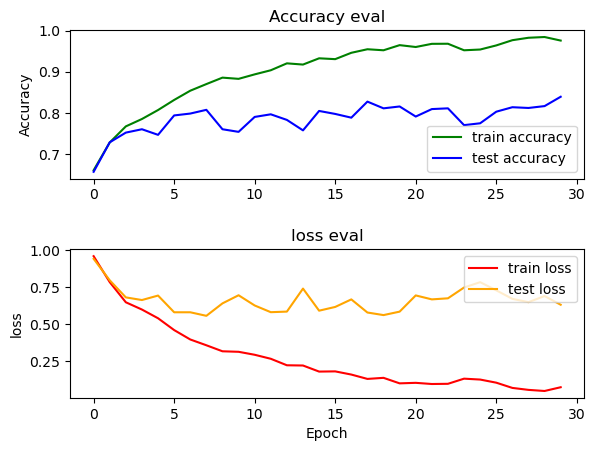

In [17]:
history=model.fit(X_train, Y_train, validation_split=0.2,epochs=30)
plot_history(history)

In [18]:
model.evaluate(X_test, Y_test)
y_predicted = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8345 - loss: 0.6288
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [21]:
import cv2
import numpy as np

# Load the image
image_path = "C:\\Users\\MBR\\Downloads\\ANN\\natural_images\\car\\car_0003.jpg"
image = cv2.imread(image_path)

# Preprocess the image
resized_image = cv2.resize(image, (56, 56)).flatten()  # Resize the image to match your model's input shape
normalized_image = resized_image.astype('float32') / 255.0  # Normalize the pixel values

# Reshape the image to match the expected input shape of your model
input_image = np.expand_dims(normalized_image, axis=0)

# Make predictions
predictions = model.predict(input_image)

# Get the predicted class label
predicted_class_index = np.argmax(predictions[0])

# Print the predicted class label
print("Predicted class index:", predicted_class_index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted class index: 1


Text(95.72222222222221, 0.5, 'Truth')

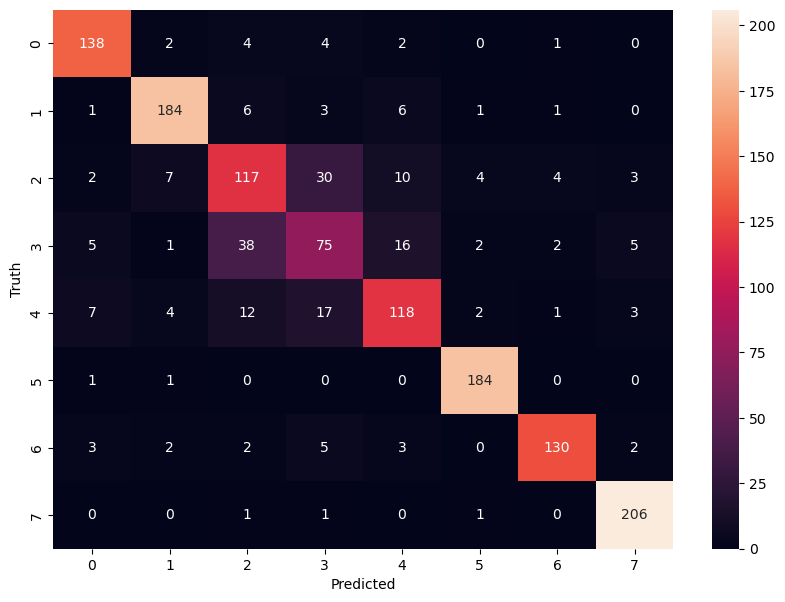

In [22]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, y_predicted_labels,average = 'weighted')
print('F1 score: %f' % f1)

F1 score: 0.832959


In [24]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, y_predicted_labels)
print('Accuracy: %f' % accuracy)

Accuracy: 0.834783


In [25]:
img_width=180
img_height=180

In [26]:
model.save('image_classifyyyy.keras')

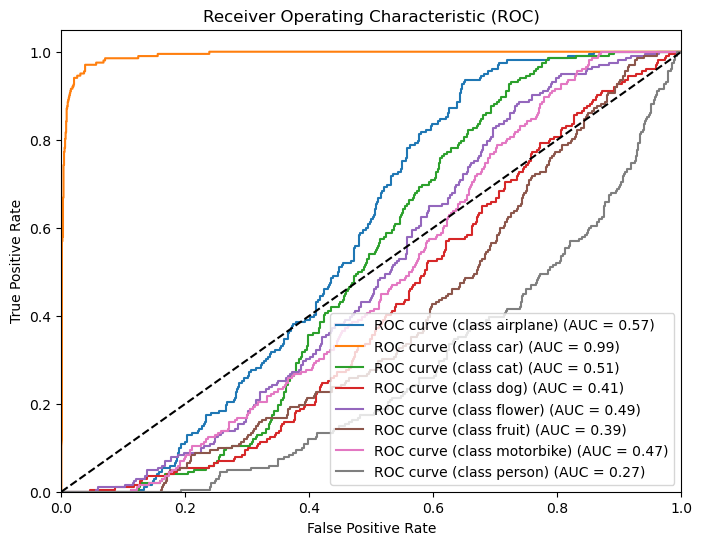

In [27]:
data_cat = labels
# Calculate the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(data_cat)):
    fpr[i], tpr[i], _ = roc_curve(Y_test==1, y_predicted[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(data_cat)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {data_cat[i]}) (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [28]:
score= tf.nn.softmax(predictions)

print('Image is {} with Accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Image is car with Accuracy of 27.97


In [29]:
import streamlit as st
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the pre-trained model
model_path = r"C:\Users\MBR\Downloads\ANN\image_classifyyyy.keras"
model = load_model(model_path)

# Define class labels
CLASS_LABELS = ['person', 'motorbike', 'fruit', 'flower', 'dog', 'cat', 'car', 'airplane']

# Function to preprocess the image
def preprocess_image(image):
    resized_image = cv2.resize(image, (56, 56)).flatten()  # Resize the image
    normalized_image = resized_image.astype('float32') / 255.0  # Normalize the pixel values
    input_image = np.expand_dims(normalized_image, axis=0)  # Add batch dimension
    return input_image

# Streamlit UI
st.title("Image Classification App")

# Image upload section
st.header("Upload Image")
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display the uploaded image
    image = cv2.imdecode(np.fromstring(uploaded_file.read(), np.uint8), 1)
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Preprocess the uploaded image
    preprocessed_image = preprocess_image(image)

    # Make predictions
    predictions = model.predict(preprocessed_image)
    predicted_class_index = np.argmax(predictions)
    predicted_class = CLASS_LABELS[predicted_class_index]

    # Display prediction results
    st.subheader("Prediction")
    st.write(f"The predicted class is: {predicted_class}")
    st.write("Confidence score:")
    st.write(predictions[0][predicted_class_index])
